In [1]:
import os
import subprocess
import time
os.environ['LSST_DDS_DOMAIN'] = 'auxtelpath'
from salpytools import salpylib 
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
calibrationElectrometer = salpylib.DDSSubscriberContainer('calibrationElectrometer')

[2018-07-12 02:15:54] [DEBUG] Loading Device: calibrationElectrometer
[2018-07-12 02:15:54] [DEBUG] Loading all topics from calibrationElectrometer
[2018-07-12 02:15:54] [DEBUG] Adding AppliedSettingsMatchStart...
[2018-07-12 02:15:56] [DEBUG] Event subscriber ready for Device:calibrationElectrometer topic:AppliedSettingsMatchStart
[2018-07-12 02:15:56] [DEBUG] Adding DetailedState...
[2018-07-12 02:15:56] [DEBUG] Event subscriber ready for Device:calibrationElectrometer topic:DetailedState
[2018-07-12 02:15:56] [DEBUG] Adding ErrorCode...
[2018-07-12 02:15:56] [DEBUG] Event subscriber ready for Device:calibrationElectrometer topic:ErrorCode
[2018-07-12 02:15:56] [DEBUG] Adding Heartbeat...
[2018-07-12 02:15:56] [DEBUG] Event subscriber ready for Device:calibrationElectrometer topic:Heartbeat
[2018-07-12 02:15:56] [DEBUG] Adding IntegrationTime...
[2018-07-12 02:15:56] [DEBUG] Event subscriber ready for Device:calibrationElectrometer topic:IntegrationTime
[2018-07-12 02:15:56] [DEBUG] 

In [3]:
sender = salpylib.DDSSend("calibrationElectrometer")

[2018-07-12 02:15:57] [DEBUG] Loading Device: calibrationElectrometer


In [5]:
# Setup Electrometer
print(calibrationElectrometer.LargeFileObjectAvailable.URL)
cmd_id = sender.send_Command('StartScanDt', electId=1, time=5, timeout=10, wait_command=True)
print(cmd_id)
print(calibrationElectrometer.LargeFileObjectAvailable.URL)

[2018-07-12 02:16:16] [DEBUG] Updating myData object with kwargs
[2018-07-12 02:16:16] [DEBUG] electId = 1
[2018-07-12 02:16:16] [DEBUG] time = 5
[2018-07-12 02:16:16] [DEBUG] Issuing command: StartScanDt



(596516650, 303)
scp://saluser@140.252.33.129:/home/saluser/ts_electrometer/ts_electrometeruserevents/Subprojects/ID1_1531376183.24640107.fits


In [6]:
fname = calibrationElectrometer.LargeFileObjectAvailable.URL

In [7]:
scp_from = fname.split('://')[1]
scp_to = os.path.expanduser('~/data/')

In [8]:
if not os.path.exists(scp_to):
    os.makedirs(scp_to)

In [9]:
cmd = 'scp {} {}'.format(scp_from, scp_to)
print(cmd)
proc = subprocess.run(cmd, shell=True, check=True)

scp saluser@140.252.33.129:/home/saluser/ts_electrometer/ts_electrometeruserevents/Subprojects/ID1_1531376183.24640107.fits /home/saluser/data/


In [10]:
proc.returncode

0

In [11]:
filename = scp_from.split('/')[-1]
hdu = fits.open(os.path.join(scp_to,filename))
data =hdu[0].data.T

(-0.2426248073577881, 5.0951209545135496)

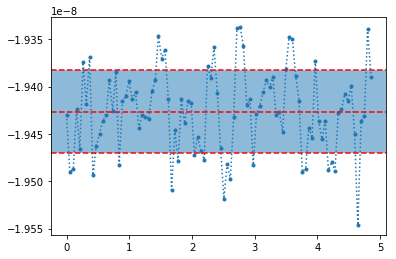

In [12]:
mean = np.mean(data[1])
std = np.std(data[1])

py.plot(data[0],data[1],'.:')

xlim = py.xlim()
py.fill_between(xlim,[mean-std,mean-std], [mean+std,mean+std],alpha=0.5)
py.plot(xlim, [mean-std,mean-std], 'r--')
py.plot(xlim, [mean,mean], 'r--')
py.plot(xlim, [mean+std,mean+std], 'r--')

py.xlim(xlim)